<a href="https://colab.research.google.com/github/prodoInaya/cinema/blob/main/%D1%81inema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Взглянем на наши данные и посмотрим на статистические характеристики каждой выборки: общее количество данных, среднее, минимум, максимум, квартили 25%, 50%, 75% и стандартное отклонение данных. Конечно, для столбцов с нечисловыми значениями мы не сможем посчитать данные характеристики, да и не все посчитанные значения будут иметь для нас смысл.
Так, наибольший интерес о статистических характеристиках могут вызвать данные из number_of_tickets, sales_in_cu и ticket_price_in_cu для анализа спроса посетителей кинотеатра.

In [ ]:
import numpy as np
import math
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt


dataset = pd.read_excel('/content/cinema.xlsx')
df = pd.DataFrame(dataset)
print(dataset.head())
print(df.describe())

   order_id creation_date session_date  movie_id         movie_name  \
0   2441412    2020-03-07   2020-03-07     32452  Маленькие женщины   
1   2169133    2020-02-03   2020-02-04     32452  Маленькие женщины   
2   2187694    2020-02-06   2020-02-06     32452  Маленькие женщины   
3   2182225    2020-02-05   2020-02-05     32452  Маленькие женщины   
4   2209967    2020-02-08   2020-02-12     32452  Маленькие женщины   

  movie_duration movie_age_restriction  movie_rating  genre_is_triller  \
0            135                   12+           7.7               0.0   
1            135                   12+           7.7               0.0   
2            135                   12+           7.7               0.0   
3            135                   12+           7.7               0.0   
4            135                   12+           7.7               0.0   

   genre_is_military  ...  number_of_tickets  \
0                0.0  ...                  2   
1                0.0  ...       

Посмотрим на распределение количества проданных билетов по дням недели (отдельно рассмотрим creation_date и session_date - дата покупки билетов и дата сеанса)

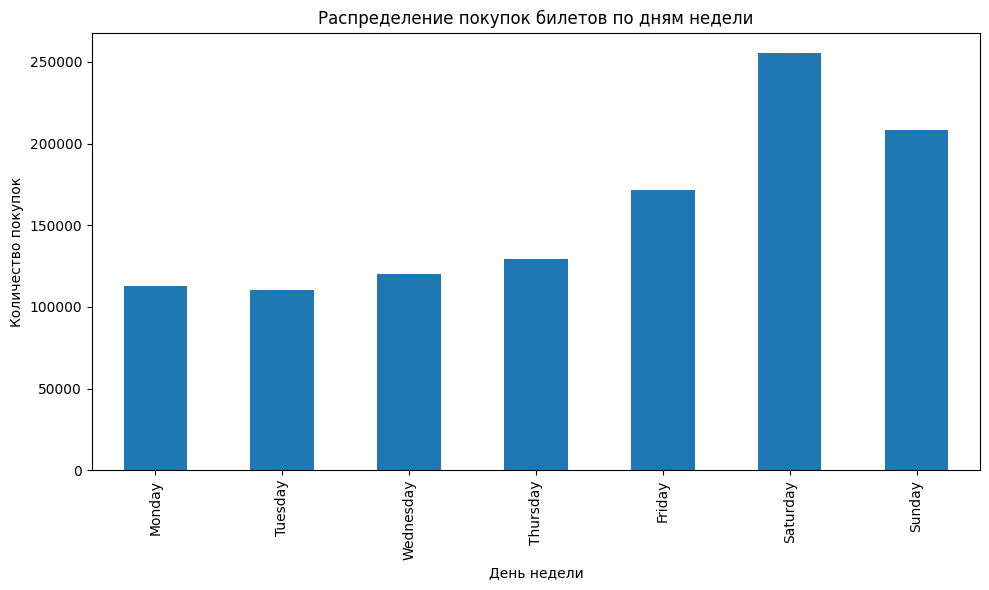

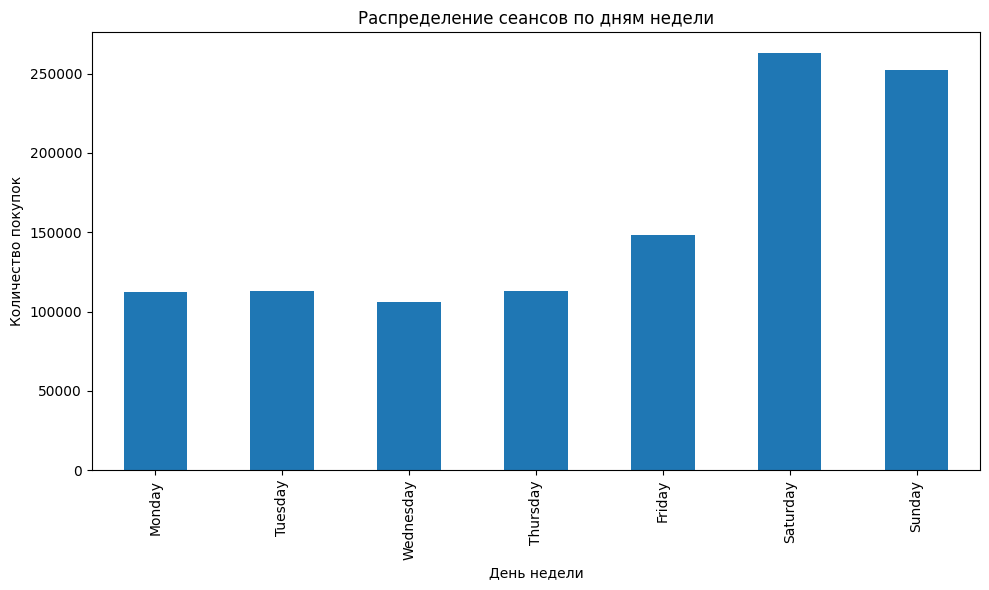

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/cinema_successful_orders.csv', delimiter=';')

df['creation_date'] = pd.to_datetime(df['creation_date'], dayfirst=True)
df['session_date'] = pd.to_datetime(df['session_date'], dayfirst=True)

df['day_of_week_сreation'] = df['creation_date'].dt.day_name()
df['day_of_week_session'] = df['session_date'].dt.day_name()

weekday_counts_cr = df.groupby('day_of_week_сreation')['number_of_tickets'].sum()
weekday_counts_se = df.groupby('day_of_week_session')['number_of_tickets'].sum()

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_counts_cr = weekday_counts_cr.reindex(ordered_days)
weekday_counts_se = weekday_counts_se.reindex(ordered_days)

plt.figure(figsize=(10, 6))
weekday_counts_cr.plot(kind='bar')
plt.title('Распределение покупок билетов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество покупок')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
weekday_counts_se.plot(kind='bar')
plt.title('Распределение сеансов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество покупок')
plt.tight_layout()
plt.show()

Как мы видим, распределения по дням недели покупки билетов и сеансов довольны схожи. Максимальное количество покупок люди совершают в субботу, а вот максимальное количество сеансов приходится на субботу и воскресенье (практически в одинаковом количестве).
Далее рассмотрим распределение продаж билетов по различным жанрам фильмов и возрастным категориям, с помощью которого мы поймем целевую аудиторию посетителей кинотеатров.


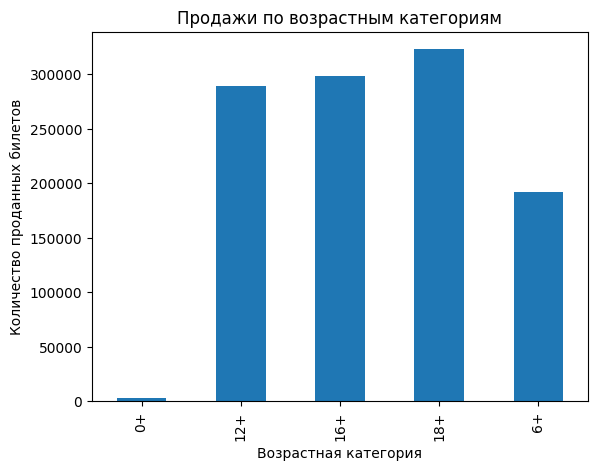

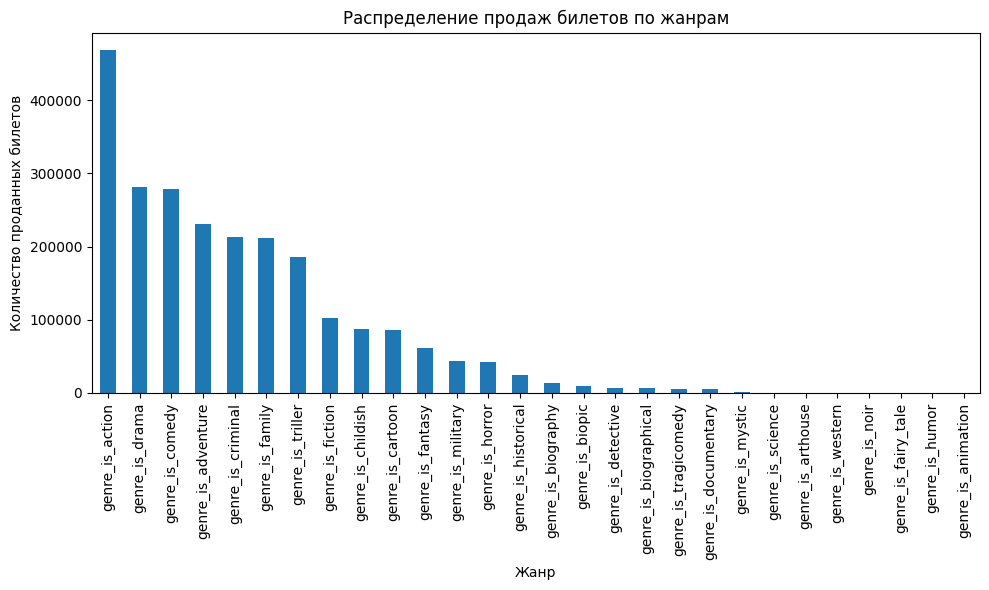

In [22]:
age_category_sales = df.groupby('movie_age_restriction')['number_of_tickets'].sum()
age_category_sales.plot(kind='bar')
plt.title('Продажи по возрастным категориям')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество проданных билетов')
plt.show()

genre_columns = [col for col in df.columns if 'genre_is_' in col]
genre_counts = df[genre_columns].multiply(df['number_of_tickets'], axis="index").sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.title('Распределение продаж билетов по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных билетов')

plt.tight_layout()
plt.show()

Как мы видим, посетители кинотеатров больше всего предпочитают боевики, драмы и комедии. Меньше всего предпочитают анимации, однако, если обратить внимание на классификацию жанров, можно заметить, что в датасете присутствуют схожие жанры, выделенные как отдельные: comedy и humor как отдельные виды жанров, cartoon и animation. Для более корректного анализа наименее популярных жанров стоит объединить данные столбцы.
Из распределения по возрастному ограничению видим, что меньше всего люди ходят на фильмы 0+, несколько больше на 6+ и чаще всего на 18+.

Рассмотрим, на какие жанры люди предпочитают ходить группой.

In [24]:
genre_columns = [col for col in df.columns if 'genre_is_' in col]

genre_distribution = pd.DataFrame()
for genre in genre_columns:
    genre_data = df[df[genre] == 1]
    stats = {
        'mean': genre_data['number_of_tickets'].mean(),
        'median': genre_data['number_of_tickets'].median(),
        'min': genre_data['number_of_tickets'].min(),
        'max': genre_data['number_of_tickets'].max()}
    genre_distribution = pd.concat([genre_distribution, pd.DataFrame(stats, index=[genre])])

print(genre_distribution)

                           mean  median  min  max
genre_is_triller       2.023480     2.0  1.0  6.0
genre_is_military      1.970310     2.0  1.0  6.0
genre_is_action        2.071360     2.0  1.0  6.0
genre_is_biographical  1.940583     2.0  1.0  6.0
genre_is_fairy_tale         NaN     NaN  NaN  NaN
genre_is_science       2.476440     2.0  1.0  6.0
genre_is_fantasy       2.183175     2.0  1.0  6.0
genre_is_historical    2.172938     2.0  1.0  6.0
genre_is_drama         1.991627     2.0  1.0  6.0
genre_is_animation          NaN     NaN  NaN  NaN
genre_is_cartoon       2.399555     2.0  1.0  6.0
genre_is_documentary   1.728370     2.0  1.0  6.0
genre_is_adventure     2.260800     2.0  1.0  6.0
genre_is_fiction       2.111804     2.0  1.0  6.0
genre_is_childish      2.289573     2.0  1.0  6.0
genre_is_horror        2.035714     2.0  1.0  6.0
genre_is_humor              NaN     NaN  NaN  NaN
genre_is_western       1.852941     2.0  1.0  4.0
genre_is_noir          1.500000     1.5  1.0  2.0


На удивление, больше всего среднее по количеству покупок билетов пришлось на категорию genre_is_science.
Построим диаграмму рассеяния для зависимости количества проданных билетов от стоимости одного билета:

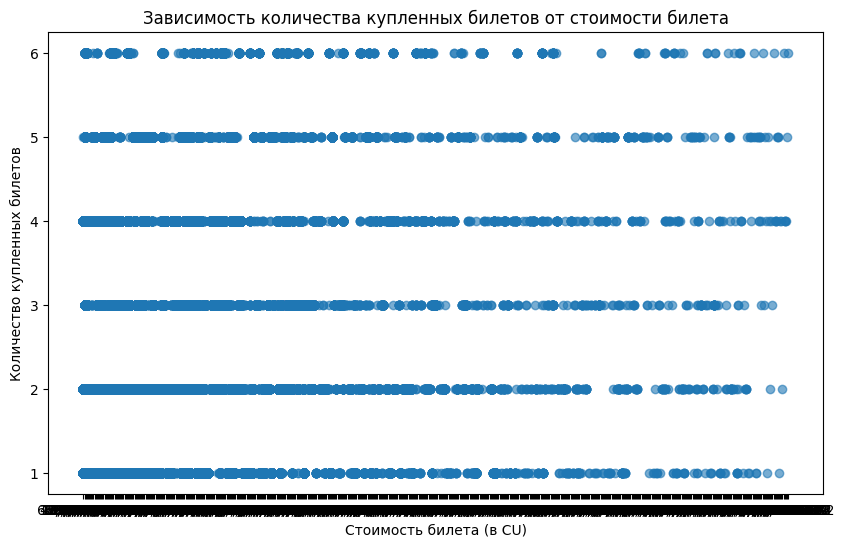

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['sales_in_cu'], df['number_of_tickets'], alpha=0.6)
plt.title('Зависимость количества купленных билетов от стоимости билета')
plt.xlabel('Стоимость билета (в CU)')
plt.ylabel('Количество купленных билетов')
plt.show()

Видим, что 6 билетов сразу покупает меньшее количество людей, но при увеличении стоимости одного билета количество таких покупок еще больше сокращается. Для каждого типа покупки (от 1 до 6 билетов) имеется тендеция снижения частоты с увеличением стоимости одного билета.

Нам хотелось бы научиться предугадывать объем продаж билетов
по характеристикам фильмов. Построим модель линейной регрессии и оценим ее качество с помощью среднеквадратической ошибки и коэффициента детерминации.
У нас есть следующие предполагаемые характеристики, влияющие на выручку: рейтинг фильма, возрастные ограничения, продолжительность фильма и жанр фильма. Интересует нас предсказание выручки за заказ.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

df = pd.read_csv('/content/cinema_successful_orders.csv', delimiter=';')

for col in ['movie_rating']:
    df[col] = df[col].str.replace(',', '.').fillna(0).astype(float)

df['movie_duration'] = df['movie_duration'].str.replace(' мин.', '').str.replace(' минут', '').str.replace('-', '0').fillna('0')
for col in ['movie_duration']:
  #if ' мин.' in df[col]:
    #df[col] = df[col].str.replace(' мин.', '').astype(float)
  df[col] = df[col].str.replace(',', '.').astype(float)
df['sales_in_cu'] = df['sales_in_cu'].str.replace(',', '.').astype(float)
df['sales_in_cu'] = df['sales_in_cu'].round().astype(int)
df['movie_age_restriction'] = df['movie_age_restriction'].str.replace('+', '').fillna('0').astype(int)


genre_columns = [col for col in df.columns if 'genre_is_' in col]
X = df[['movie_rating', 'movie_duration', 'movie_age_restriction']]
y = df['sales_in_cu']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.fillna('0')
y_train = y_train.fillna('0')
X_test = X_test.fillna('0')
y_test = y_test.fillna('0')

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f'Среднеквадратичная ошибка (MSE): {mean_squared_error(y_test, y_pred)}')
print(f'Коэффициент детерминации (R^2): {r2_score(y_test, y_pred)}')

Среднеквадратичная ошибка (MSE): 3652.5468769063154
Коэффициент детерминации (R^2): 0.006060266072346332
